In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import spline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Perceptron

Perceptron é um classificador binário linear e representa um neurônio, a estrutura básica de uma rede neural. No perceptron, recebe-se os atributos de entrada da base de treinamento (e.g. as entradas de uma porta lógica AND/OR) e multiplica, cada uma delas, por um peso W, conforme Figura 1. Feito isso, os valores resultantes são somados e passam por uma função de ativação.
Nesse notebook, todos os passos para implementação do perceptron serão feitos utilizando Numpy, para isso, 5 etapas deverão ser feitas:
1. Inicializaçao dos pesos e bias
2. Implementando funções de ativação
3. Calculando a saída do neurônio
4. Predição
5. Treino e avaliação

![alt text](imgs/perceptron.jpg "Title")

### Parte 1 - Inicialização dos pesos e bias

Ao implementar um perceptron, o primeiro passo é iniciar os pesos em um intervalo pequeno, como [-0.5,0.5] aleatoriamente. O bias quando necessário também deve ser inicializado nessa etapa.

Para implementar essa etapa, voçê deve utilizar a função weight_init(num_inputs). Dica: você pode utilizar a [função random do numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.random.html)

In [4]:
def weight_init(num_inputs): 
    """
    Função que inicializa os pesos e bias aleatoriamente utilizando numpy
    Parâmetro: num_inputs - quantidade de entradas X
    Retorna: w,b - pesos e bias da rede inicializados
    """
    ### Insira seu código aqui (~2 linhas)
    w = np.random.random((1, num_inputs))  - 0.5
    b = 2*np.random.random() - 1 
    print(w, b)
    #print('w: ', w)
    return w,b
    
#weight_init(4)

### Parte 2 - Implementação das funções de ativação
As funções de ativação definem o intervalo de valores que a saída do neurônio poderá ter. Para redes neurais tradicionais, utiliza-se as funções degrau e sigmoid. Redes neurais profundas podem utilizar as funções ReLU, LeakyReLU e Tangente Hiperbólica para evitar problemas no gradiente.

Nsse Notebook, as quatro funções de ativação devem ser implementadas, para verificar a corretude das mesmas, a função visualizeActivationFunc exibe os gráficos correspondentes, as funçoes, suas respectivas saídas e gráfico deverão ser similares ao exposto abaixo: (Dica: utilize a [função exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html) do numpy)
* Degrau: saída 0 se menor que 0 e saída 1 caso contrário
$$ \begin{equation}
  degrau =\begin{cases}
    1, & \text{se $x>0$}.\\
    0, & \text{caso contrário}.
  \end{cases}
\end{equation} $$
![alt text](imgs/degrau.png "Title")
* Sigmoid: saída entre [0,1]
$$ \begin{equation}
  sigmoid = \frac{1}{1 + e^{-z}}
\end{equation} $$
![alt text](imgs/sigmoid.png "Title")
* Retificadora (Relu): saída 0 caso entrada seja negativa e maior que 1 caso contrário
$$ \begin{equation}
  relu = max(0,x)
\end{equation} $$
![alt text](imgs/relu.png "Title")
* Tangente Hiperbólica: saída entre [-1,1]
$$ \begin{equation}
  tanh = \frac{2}{(1+e^{-2*z})} - 1
\end{equation} $$
![alt text](imgs/tanh.png "Title")

In [5]:
def activation_func(func_type, z):
    """
    Função que implementa as funções de ativação mais comuns
    Parãmetros: func_type - uma string que contém a função de ativação desejada
                z - vetor com os valores de entrada X multiplicado pelos pesos
    Retorna: saída da função de ativação
    """
    ### Seu código aqui (~2 linhas)
    if func_type == 'sigmoid':
        return 1 / (1 + np.exp(-z))
    elif func_type == 'tanh':
        return (2 / (1 + np.exp(-2*z))) - 1
    elif func_type == 'relu':
        return max(0,z)
    elif func_type == 'degrau':
        if z > 0:
            return 1
        return 0 

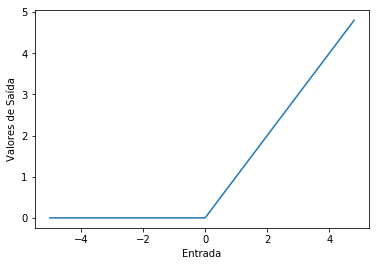

In [6]:
z = np.arange(-5., 5., 0.2)
def visualizeActivationFunc(z):
    z = np.arange(-5., 5., 0.2)
    func = []
    for i in range(len(z)):
        func.append(activation_func('relu', z[i]))

    plt.plot(z,func)
    plt.xlabel('Entrada')
    plt.ylabel('Valores de Saída')
    plt.show()
visualizeActivationFunc(z)

### Parte 3 - Cálculo da saída do neurônio¶

Com os pesos, bias inicializados e a função de ativação implementada, calcula-se a saída através da equação:

 $$ \begin{equation}
  Z = W*X + b
\end{equation} $$
Feito isso, a saída final é calculada a partir da função de ativação escolhida. Para implementar essa função, você pode utilizar a [função dot do numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) para multiplicar

In [8]:
def forward(w,b,X):
    """
    Função que implementa a etapa forward propagate do neurônio
    Parâmetros: w - pesos
                b - bias
                X - entradas
    """
    ### Seu código aqui (~2 linhas)
    z = X.dot(p)
    out = z + b
    return out

### Parte 4 - Predição
De posse da saída, deve-se avaliar o sucesso da mesma definindo-se um limiar. Para problemas binários, pode-se estabelecer o limiar em 0.5, de forma que abaixo disso a saída é 0 e 1 caso contrário.

In [9]:
def predict(out):
    """
    Função que aplica um limiar na saída
    Parâmetro: y - saída do neurònio
    """
    ### Seu código aqui (~1 linha)
    return 0 if y<0.5 else 1

### Parte 5 - Treino e Avaliação

Durante o treinamento, a saída é calculada pela função propagate n vezes, onde n é a quantidade de interações do algoritmo. Na primeira interação, os pesos possuem valores pré-definidos pela função de inicialização e são aleatórios após essa interação, as próximas calculam o peso baseado em um erro, calculado a partir da equação:

 $$ \begin{equation}
  erro = y - ypred
\end{equation} $$

Onde y é a saída original do conjunto de dados e y_pred as saidas calculadas. Dado o erro, os pesos são atualizados a partir da equação:

$$ \begin{equation}
  w += erro*taxa-de-aprendizado*X
\end{equation} $$

 
Onde X é o conjunto de entrada e a taxa de aprendizagem é um parâmetro de otimização que possui seus valorse variando entre [0,1]. Recomenda-se o uso de taxas de aprendizagem medianas para problemas com redes neurais tradicionais simples (como 0.2-0.5) e taxas de aprendizagem menores para redes neurais profundas (acima de 0.02).

In [13]:
def perceptron(x,y, num_interaction, learning_rate):
    """
    Função que implementa o loop do treinamento 
    Parâmetros: x - entrada da rede 
                y - rótulos/labels
                num_interaction - quantidade de interações desejada para a rede convergir
                learning_rate - taxa de aprendizado para cálculo do erro
    """
    #Passo 1 - Inicie os pesos e bias (~1 linha)
    w,b = weight_init(x)
    #Passo 2 - Loop por X interações
    for j in range(num_interaction):
        # Passo 3 -  calcule a saída do neurônio (~1 linha)
        y_pred = foward(w, b, x)
        # Passo 4 - calcule o erro entre a saída obtida e a saída desejada nos rótulos/labels (~1 linha)
        erro = y - y_pred 
        # Passo 5 - Atualize o valor dos pesos (~1 linha)
        # Dica: você pode utilizar a função np.dot e a função transpose de numpy 
        w += erro * learning_rate * x  
        
    # Verifique as saídas
    print('Saída obtida:', y_pred)
    print('Pesos obtidos:', w)

    #Métricas de Avaliação
    y_pred = predict(y_pred)
    print('Matriz de Confusão:')
    print(confusion_matrix(y, y_pred))
    print('F1 Score:')
    print(classification_report(y, y_pred))

In [12]:
entradas = np.array([[0,0], [0,1], [1,0], [1,1]])
saidas = np.array([0, 0, 0, 1])
perceptron(x.shape[1], saidas, 10)

TypeError: only integer scalar arrays can be converted to a scalar index